### Dataset Preparation
This notebook loads CIFAR-10 dataset and then save as images

In [1]:
# setup
import os
# create dataset folder
dataset_path = '../Datasets/CIFAR10'

# create directories for CIFAR-10 images
img_path = '../Datasets/CIFAR10/images'

os.makedirs(dataset_path, exist_ok=True)
os.makedirs(img_path, exist_ok=True)

In [2]:
# Load images and normalize
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#load-and-normalize-cifar10
import torch
import torchvision
import torchvision.transforms as transforms

from IPython.display import clear_output 

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(224),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 32
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
label_map = {k: v for k, v in enumerate(classes)}
clear_output()

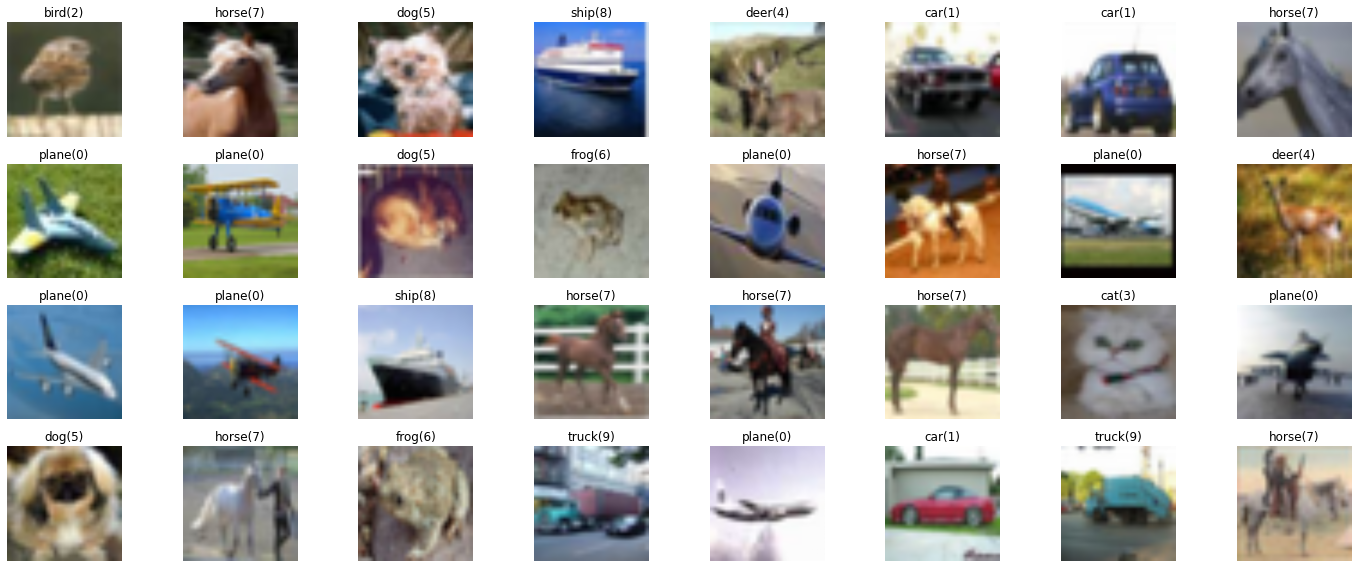

In [3]:
# Random batch visualization
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

# create a sample batch
sample_batch = next(iter(train_loader))
sample_images, sample_labels = sample_batch

sample_count = 32
rows = sample_count // 8
figure, ax = plt.subplots(nrows=rows, ncols=8, figsize=(20, sample_count // rows))

for i, idx in enumerate(range(32)):
    image, label = sample_images[idx], sample_labels[idx]
    image = image / 2 + 0.5
    ax.ravel()[i].imshow(np.transpose(image, (1, 2, 0)))
    title = f'{label_map[sample_labels[idx].item()]}({sample_labels[idx]})'
    ax.ravel()[i].set_title(title)
    ax.ravel()[i].set_axis_off()
    
plt.tight_layout()
plt.show()

In [4]:
# Get all images that have been downloaded
import os
images = os.listdir(img_path)
images_ids = [int(i.split('.')[0]) for i in images]

In [5]:
# Save the image arrays to images (.png)
import numpy as np
from matplotlib import pyplot as plt
from tqdm.autonotebook import tqdm

labels = []

for i, (image, label) in tqdm(enumerate(train_set), total=len(train_set)):
    labels.append(label)
    if i+1 in images_ids: continue
    image = image / 2 + 0.5
    image = image.numpy().transpose(1, 2, 0)
    plt.imsave(f'{img_path}/{i+1:05d}.png', image)
clear_output()

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
# Repeat the process for the test set
for i, (image, label) in tqdm(enumerate(test_set), total=len(test_set)):
    labels.append(label)
    if i+1+len(train_set) in images_ids: continue
    image = image / 2 + 0.5
    image = image.numpy().transpose(1, 2, 0)
    # plt.axis('off')
    plt.imsave(f'{img_path}/{i+len(train_set)+1:05d}.png', image);
    # plt.savefig(f'{img_path}/{i+1:05d}.png', bbox_inches='tight', pad_inches=-0.1)

clear_output()

In [ ]:
# create and save the data file with image filenames and the labels
import pandas as pd
data_df = pd.DataFrame(dict(
    image=[f'{i+1:05d}.png' for i in range(len(train_set)+len(test_set))], 
    label=labels,
    label_name=[label_map[label] for label in labels]
))
data_df.to_csv(f'{dataset_path}/data.csv', index=False)
data_df = pd.read_csv(f'{dataset_path}/data.csv')
data_df.head(10)

,image,label,label_name
0,00001.png,6,frog
1,00002.png,9,truck
2,00003.png,9,truck
3,00004.png,4,deer
4,00005.png,1,car
5,00006.png,1,car
6,00007.png,2,bird
7,00008.png,7,horse
8,00009.png,8,ship
9,00010.png,3,cat


[53285.png] Expected label: deer


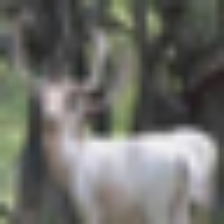

In [ ]:
# Display and test for a random image
from PIL import Image
random_idx = np.random.choice(data_df.index)
print(f'[{random_idx+1:05d}.png] Expected label:', data_df.label_name[random_idx])
Image.open(f'{img_path}/{random_idx+1:05d}.png')